In [4]:
import json 
import matplotlib
from matplotlib import pyplot as plt
import pickle
import pandas as pd
import numpy as np 
import sklearn 
import statistics
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline


In [5]:
full_data = pd.read_csv('../../data/raw-data/filtered_everything.csv', index_col=0)
combined_test = pd.read_csv('../../data/splitted-data/everything/nbins-10/test_set.csv', index_col=0)
m2575 = pd.read_csv('../../data/raw-data/unprocessed/mixed-25-75.csv', index_col=0)
m2575_test = pd.read_csv('../../data/splitted-data/mixed2575/nbins-10/test_set.csv', index_col=0)
m5050_test = pd.read_csv('../../data/splitted-data/mixed5050/nbins-10/test_set.csv', index_col=0)
optimal = pd.read_csv('../../data/raw-data/opt_22_raw.csv', index_col=0)


In [6]:
oresults_path = '../predicted-results/original/nbins-10'
mresults_path = '../predicted-results/mixed5050/nbins-10'
eresults_path = '../predicted-results/everything/nbins-10'

omodels_path = '../models/original'
mmodels_path = '../models/mixed5050/nbins-10'
emodels_path = '../models/everything/nbins-10'

test_sets = ['5050', '2575', 'everything']

mpoints = [100, 200, 300, 500, 1000, 1500, 2000, 2500, 'all']
epoints = [100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 'all']


# Setting up and Sorting

In [7]:
# Consider 5050 models and everything models at the 2500 mark 
m5models = dict()
emodels = dict()
omodels = dict()
# 5050 model
for tset in ['5050', '2575', 'everything']:
    m5models[tset] = dict()
    emodels[tset] = dict()
    omodels[tset] = dict()
    
    '''First load the original models'''
    for target in ['COF', 'intercept']:
        with open(f'{omodels_path}/{target}.pickle', 'rb') as f:
            model = pickle.load(f)
        with open(f'{omodels_path}/{target}.ptxt', 'rb') as f:
            features = pickle.load(f)
        with open(f'{oresults_path}/{target}_on_{tset}.json', 'r') as f:
            data = json.load(f)
        omodels[tset][target] = {
#                                 'model': model,
                                 'features': features,
                                 'data': data,
                                 'n_train': len(model.oob_prediction_),
                                 'r_square': data[target]['r_square']}
        
    '''Then load the mixed5050 models'''
    for target in ['COF', 'intercept']:
        m5models[tset][target] = dict()
        for point in mpoints:
            m5models[tset][target][point] = dict()
            for i in range(5):
                with open(f'{mmodels_path}/set_{i}/{target}_{point}.pickle', 'rb') as f:
                    model = pickle.load(f)
                with open(f'{mmodels_path}/set_{i}/{target}_{point}.ptxt', 'rb') as f:
                    features = pickle.load(f)
                with open(f'{mresults_path}/set_{i}/{target}_{point}_on_{tset}.json', 'r') as f :
                    data = json.load(f)
                
                m5models[tset][target][point][f'set_{i}'] = dict()
                m5models[tset][target][point][f'set_{i}'] = {
#                  'model': model,
                  'features': features,
                  'data': data,
                  'n_train': len(model.oob_prediction_),
                  'r_square': data[target]['r_square']}

                    
    '''Finally load the combined models'''
    for target in ['COF', 'intercept']:
        emodels[tset][target] = dict()
        for point in epoints:
            emodels[tset][target][point] = dict()
            for i in range(5):
                with open(f'{emodels_path}/set_{i}/{target}_{point}.pickle', 'rb') as f:
                    model = pickle.load(f)
                with open(f'{emodels_path}/set_{i}/{target}_{point}.ptxt', 'rb') as f:
                    features = pickle.load(f)
                with open(f'{eresults_path}/set_{i}/{target}_{point}_on_{tset}.json', 'r') as f :
                    data = json.load(f)
                    
                emodels[tset][target][point][f'set_{i}'] = dict()
                emodels[tset][target][point][f'set_{i}'] = {
#                  'model': model,
                  'features': features,
                  'data': data,
                  'n_train': len(model.oob_prediction_),
                  'r_square': data[target]['r_square']}
 


In [8]:
doi = {'omodels': dict(), 
       'mmodels': dict(), 
       'emodels': dict()}

for tset in ['5050', '2575', 'everything']:
    doi['omodels'][f'on_{tset}'] = dict()
    for target in ['COF', 'intercept']:
        doi['omodels'][f'on_{tset}'][target] = dict()
        omoi = omodels[tset][target]
        odoi = dict() 
        odoi['terminal_group_1'] = list()
        odoi['terminal_group_2'] = list()
        odoi['terminal_group_3'] = list()
        odoi['frac-1'] = list() 
        odoi['frac-2'] = list()
        odoi[f'predicted-{target}'] = list()
        odoi[f'simulated-{target}'] = list()
        for j in omoi['data'][target]:
            if j != 'r_square':
                odoi['terminal_group_1'].append(omoi['data'][target][j]['tg-1'])
                odoi['terminal_group_2'].append(omoi['data'][target][j]['tg-2'])
                odoi['terminal_group_3'].append(omoi['data'][target][j]['tg-3'])
                odoi['frac-1'].append(omoi['data'][target][j]['frac-1'])
                odoi['frac-2'].append(omoi['data'][target][j]['frac-2'])
                odoi[f'predicted-{target}'].append(omoi['data'][target][j][f'predicted-{target}'])
                odoi[f'simulated-{target}'].append(omoi['data'][target][j][f'simulated-{target}'])

        doi['omodels'][f'on_{tset}'][target] = pd.DataFrame.from_dict(odoi)            

    for point in mpoints: 
        doi['mmodels'][f'{point}_on_{tset}'] = dict() 
        for target in ['COF', 'intercept']:
            doi['mmodels'][f'{point}_on_{tset}'][target] = dict()
            for i in range(5):
                doi['mmodels'][f'{point}_on_{tset}'][target][f'set_{i}'] = dict()
                mmoi = m5models[tset][target][point][f'set_{i}']
                mdoi = dict() 
                mdoi['terminal_group_1'] = list()
                mdoi['terminal_group_2'] = list()
                mdoi['terminal_group_3'] = list()
                mdoi['frac-1'] = list() 
                mdoi['frac-2'] = list()
                mdoi[f'predicted-{target}'] = list()
                mdoi[f'simulated-{target}'] = list()
                for j in mmoi['data'][target]:
                    if j != 'r_square':
                        mdoi['terminal_group_1'].append(mmoi['data'][target][j]['tg-1'])
                        mdoi['terminal_group_2'].append(mmoi['data'][target][j]['tg-2'])
                        mdoi['terminal_group_3'].append(mmoi['data'][target][j]['tg-3'])
                        mdoi['frac-1'].append(mmoi['data'][target][j]['frac-1'])
                        mdoi['frac-2'].append(mmoi['data'][target][j]['frac-2'])
                        mdoi[f'predicted-{target}'].append(mmoi['data'][target][j][f'predicted-{target}'])
                        mdoi[f'simulated-{target}'].append(mmoi['data'][target][j][f'simulated-{target}'])

                doi['mmodels'][f'{point}_on_{tset}'][target][f'set_{i}'] = pd.DataFrame.from_dict(mdoi)
                           
    for point in epoints: 
        doi['emodels'][f'{point}_on_{tset}'] = dict() 
        for target in ['COF', 'intercept']:
            doi['emodels'][f'{point}_on_{tset}'][target] = dict()
            for i in range(5):
                doi['emodels'][f'{point}_on_{tset}'][target][f'set_{i}'] = dict()
                emoi = emodels[tset][target][point][f'set_{i}']
                edoi = dict() 
                edoi['terminal_group_1'] = list()
                edoi['terminal_group_2'] = list()
                edoi['terminal_group_3'] = list()
                edoi['frac-1'] = list() 
                edoi['frac-2'] = list()
                edoi[f'predicted-{target}'] = list()
                edoi[f'simulated-{target}'] = list()
                for j in emoi['data'][target]:
                    if j != 'r_square':
                        edoi['terminal_group_1'].append(emoi['data'][target][j]['tg-1'])
                        edoi['terminal_group_2'].append(emoi['data'][target][j]['tg-2'])
                        edoi['terminal_group_3'].append(emoi['data'][target][j]['tg-3'])
                        edoi['frac-1'].append(emoi['data'][target][j]['frac-1'])
                        edoi['frac-2'].append(emoi['data'][target][j]['frac-2'])
                        edoi[f'predicted-{target}'].append(emoi['data'][target][j][f'predicted-{target}'])
                        edoi[f'simulated-{target}'].append(emoi['data'][target][j][f'simulated-{target}'])

                doi['emodels'][f'{point}_on_{tset}'][target][f'set_{i}'] = pd.DataFrame.from_dict(edoi)
                           
                

In [68]:
""" Code to rank top % simulated vs predicted"""
refs = {'5050': m5050_test, 
        '2575': m2575_test,
        'everything': combined_test}

identifiers = ['terminal_group_1', 'terminal_group_2', 'terminal_group_3', 'frac-1', 'frac-2']
psims = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
pprds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

plot_data = dict()
for tset in refs:
    sorted_refs = {"COF": refs[tset].sort_values(by="COF"),
                   "intercept": refs[tset].sort_values(by="intercept")}
    plot_data[tset] = {"top": dict()}
    for top_sim in psims:
        for top_prd in pprds:
            n_top_sim = round(len(refs[tset]) * top_sim)
            n_top_prd = round(len(refs[tset]) * top_prd)
            
            plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd'] = {"original": dict(), 
                                                                 "m50": dict(),
                                                                 "eve": dict()}
            # Will worry about optimal later
            plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['original']['points'] = [100]
            sorted_prd_og = dict()
            for target in ["COF", "intercept"]:
                # Handle original model
                sorted_prd_og[target] = doi["omodels"][f"on_{tset}"][target].sort_values(by=f"predicted-{target}")
                top_intersect_og = pd.merge(sorted_refs[target].head(n_top_sim),
                                         sorted_prd_og[target].head(n_top_prd),
                                         how='inner', on=identifiers)
                plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['original'][target] = [len(top_intersect_og)/n_top_sim*100]
            prd_opt_og = pd.merge(sorted_prd_og["COF"].head(n_top_prd), 
                                sorted_prd_og["intercept"].head(n_top_prd),
                                how='inner', on=identifiers)
            opt_intersect_og = pd.merge(prd_opt_og, optimal, how='inner', on=identifiers)
            plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['original']['opt'] = [len(opt_intersect_og)/len(optimal)*100]
            
            
            # Handle 5050 model
            plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['m50']['points'] = list()
            plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['m50']['COF'] = list()
            plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['m50']['intercept'] = list()
            plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['m50']['opt'] = list()
            for point in mpoints:
                plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['m50']['points'].append(point if isinstance(point, int) else 2680)
                tmp_dict = {"COF": list(), 
                            "intercept": list(),
                            "opt": list()}
                
                for i in range(5):
                    sorted_prd_m50 = dict()
                    for target in ["COF", "intercept"]:
                        sorted_prd_m50[target] = doi["mmodels"][f"{point}_on_{tset}"][target][f'set_{i}'].sort_values(by=f'predicted-{target}')
                        top_intersect_m50 = pd.merge(sorted_refs[target].head(n_top_sim),
                                                     sorted_prd_m50[target].head(n_top_prd),
                                                     how='inner', on=identifiers)
                        tmp_dict[target].append(len(top_intersect_m50)/n_top_sim*100)
                        
                    prd_opt_m50 = pd.merge(sorted_prd_m50["COF"].head(n_top_prd),
                                            sorted_prd_m50["intercept"].head(n_top_prd),
                                            how='inner', on=identifiers)
                    opt_intersect_m50 = pd.merge(prd_opt_m50, optimal, how="inner", on=identifiers)
                    tmp_dict["opt"].append(len(opt_intersect_m50)/len(optimal)*100)
                
                for target in ["COF", "intercept", "opt"]:
                    plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['m50'][target].append(tmp_dict[target])
    
            
            # Handle everything model
            plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['eve']['points'] = list()
            plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['eve']['COF'] = list()
            plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['eve']['intercept'] = list()
            plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['eve']['opt'] = list()

            for point in epoints:
                plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['eve']['points'].append(point if isinstance(point, int) else 7816)
                tmp_dict = {"COF": list(), 
                            "intercept": list(),
                            "opt": list()}
                
                for i in range(5):
                    sorted_prd_eve = dict()
                    for target in ["COF", "intercept"]:
                        sorted_prd_eve[target] = doi["emodels"][f"{point}_on_{tset}"][target][f'set_{i}'].sort_values(by=f'predicted-{target}')
                        top_intersect_eve = pd.merge(sorted_refs[target].head(n_top_sim),
                                                     sorted_prd_eve[target].head(n_top_prd),
                                                     how='inner', on=identifiers)
                        tmp_dict[target].append(len(top_intersect_eve)/n_top_sim*100)
                    prd_opt_eve = pd.merge(sorted_prd_eve["COF"].head(n_top_prd), 
                                                 sorted_prd_eve["intercept"].head(n_top_prd),
                                                 how='inner', on=identifiers)
                    opt_intersect_eve = pd.merge(prd_opt_eve, optimal, how="inner", on=identifiers)
                    tmp_dict["opt"].append(len(opt_intersect_eve)/len(optimal)*100)
                for target in ["COF", "intercept", "opt"]:
                    plot_data[tset]['top'][f'top_{top_sim}sim_{top_prd}prd']['eve'][target].append(tmp_dict[target])
                    
                

In [132]:
COFs.COF.max()

0.1292382324

In [145]:
float(min_COF["COF"])

0.0897547562333333

In [152]:
# Ref data
for tset in ["5050", "2575", "everything"]:
    sorted_df = {"COF": refs[tset].sort_values(by="COF"),
                 "intercept": refs[tset].sort_values(by="intercept")}
    for fraction in [0.15, 0.3]:
        n = round(fraction*len(refs[tset]))
        COFs = sorted_df["COF"].head(n)
        intercepts = sorted_df["intercept"].head(n)
        
        min_COF = COFs[COFs.COF == COFs.COF.min()]
        max_COF = COFs[COFs.COF == COFs.COF.max()]
        min_intercept = intercepts[intercepts.intercept == intercepts.intercept.min()]
        max_intercept = intercepts[intercepts.intercept == intercepts.intercept.max()]
        
        print(f"{tset}-test: {fraction*100}% = {n}")
        print(f"\tCOF: {round(float(min_COF['COF']), 4)} +- {round(float(min_COF['COF-std']), 4)} to \n"
              f"\t\t{round(float(max_COF['COF']), 4)} +- {round(float(max_COF['COF-std']), 4)}")
        print(f"\tintercept: {round(float(min_intercept['intercept']), 4)} +- {round(float(min_intercept['intercept-std']), 4)} to \n"
              f"\t\t{round(float(max_intercept['intercept']), 4)} +- {round(float(max_intercept['intercept-std']), 4)}")        
        

5050-test: 15.0% = 100
	COF: 0.0972 +- 0.016 to 
		0.1211 +- 0.0103
	intercept: 0.2161 +- 0.3768 to 
		0.7794 +- 0.1345
5050-test: 30.0% = 201
	COF: 0.0972 +- 0.016 to 
		0.1289 +- 0.0076
	intercept: 0.2161 +- 0.3768 to 
		1.0021 +- 0.1709
2575-test: 15.0% = 193
	COF: 0.0898 +- 0.0119 to 
		0.1218 +- 0.0138
	intercept: 0.0848 +- 0.462 to 
		0.7058 +- 0.4097
2575-test: 30.0% = 386
	COF: 0.0898 +- 0.0119 to 
		0.1295 +- 0.0107
	intercept: 0.0848 +- 0.462 to 
		0.9511 +- 0.4361
everything-test: 15.0% = 293
	COF: 0.0898 +- 0.0119 to 
		0.1216 +- 0.0104
	intercept: 0.0848 +- 0.462 to 
		0.7295 +- 0.1159
everything-test: 30.0% = 587
	COF: 0.0898 +- 0.0119 to 
		0.1292 +- 0.0154
	intercept: 0.0848 +- 0.462 to 
		0.9669 +- 0.379


# Top 15% of 5050-test/2575-test predicted by top 15%/30% m50 models

In [70]:
markersize=10
elinewidth=1
alpha=0.5

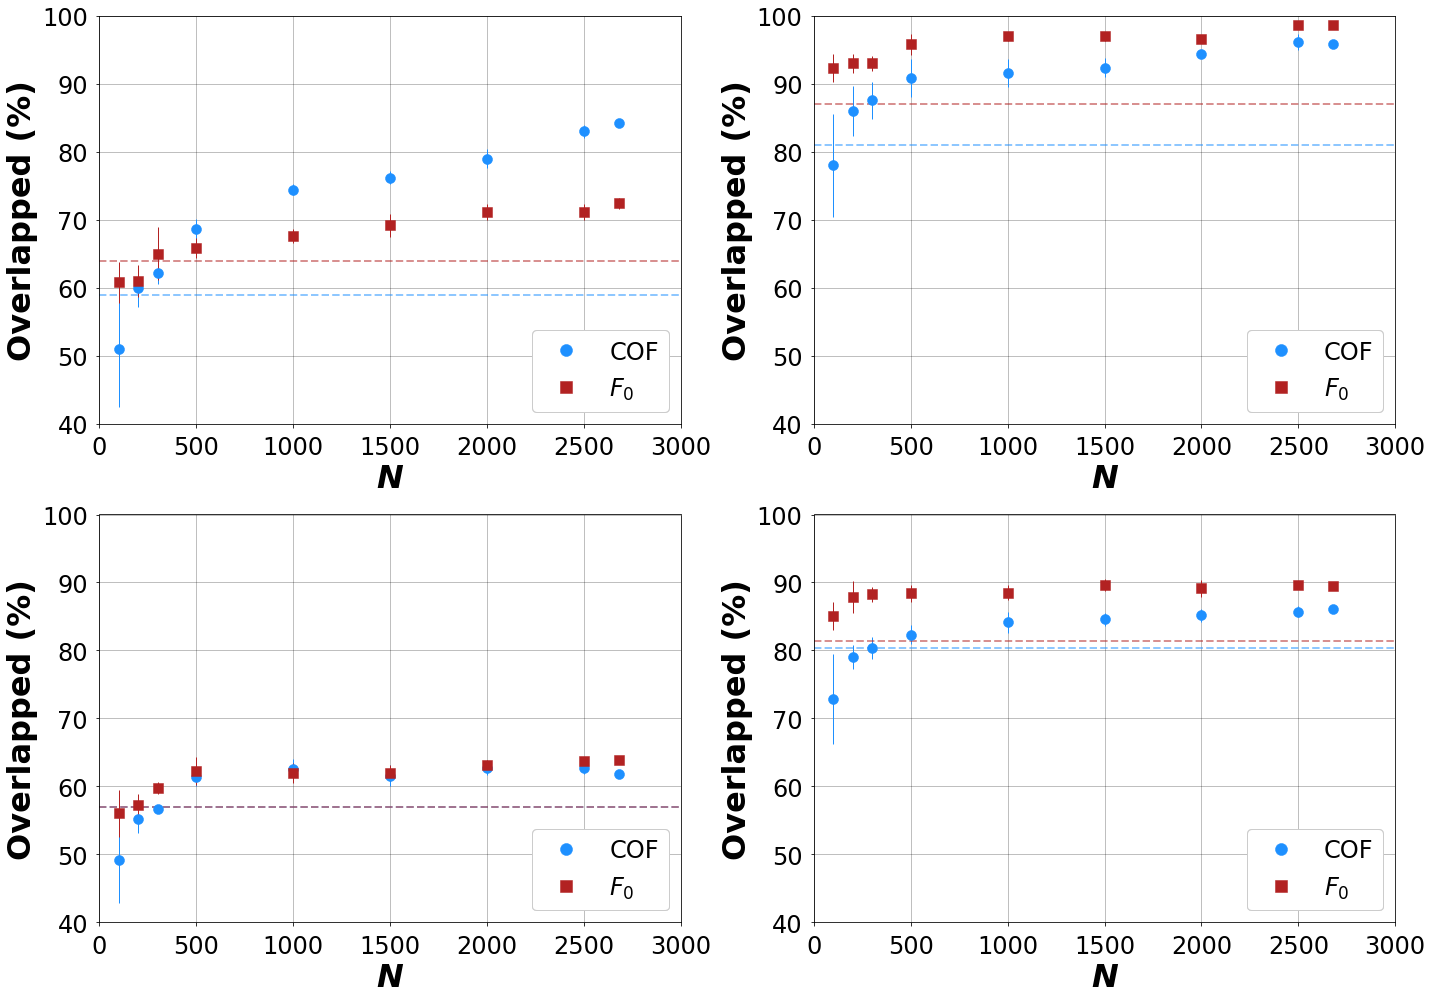

In [78]:

top_sim1 = 0.15
top_prd1 = 0.15

top_sim2 = 0.15 
top_prd2 = 0.30

fig1, ax = plt.subplots(2, 2, figsize=(20, 14))

markers = {'COF': ['o', '--', 'dodgerblue'], 'intercept': ['s', '--', 'firebrick'], 'opt': ['s', '--', 'indigo']}

for target in ['COF', 'intercept']:
    print(target)
    ax[0, 0].errorbar(x=plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50']['points'], 
                      y=[np.mean(vals) for vals in plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)
    ax[1, 0].errorbar(x=plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50']['points'], 
                      y=[np.mean(vals) for vals in plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)

    ax[0, 0].axhline(plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['original'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)
    ax[1, 0].axhline(plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['original'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)

    ax[0, 1].errorbar(x=plot_data['5050']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['m50']['points'], 
                      y=[np.mean(vals) for vals in plot_data['5050']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data['5050']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)
    ax[1, 1].errorbar(x=plot_data['2575']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['m50']['points'], 
                      y=[np.mean(vals) for vals in plot_data['2575']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data['2575']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)

    ax[0, 1].axhline(plot_data['5050']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['original'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)
    ax[1, 1].axhline(plot_data['2575']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['original'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)

    
#ax.legend()
leg1_ele = [Line2D([0], [0], color='dodgerblue', marker='o', markersize=12, linestyle='', label='COF'),
                   Line2D([0], [0], color='firebrick', marker='s', markersize=12, linestyle='', label=r'$\mathit{F_0}$')]

for i in [0, 1]:
    for j in [0, 1]:
        legend = ax[i, j].legend(handles=leg1_ele, loc=4, prop={'size': 24})# title='Properties')
        ax[i, j].set_ylim(40, 100)
        ax[i, j].set_xlim(0, 3000)
        ax[i, j].set_xlabel('N', style='italic')
        ax[i, j].set_ylabel('Overlapped (%)')
        ax[i, j].add_artist(legend)

plt.savefig(fname=f'./plots/top_v2/train50({top_prd1}-{top_prd2})-test50({top_sim1})test25({top_sim1}).pdf', dpi=500, bbox_inches='tight')

plt.show()
plt.close()

## Top 15% of test-5050/2575 predicted by m50 

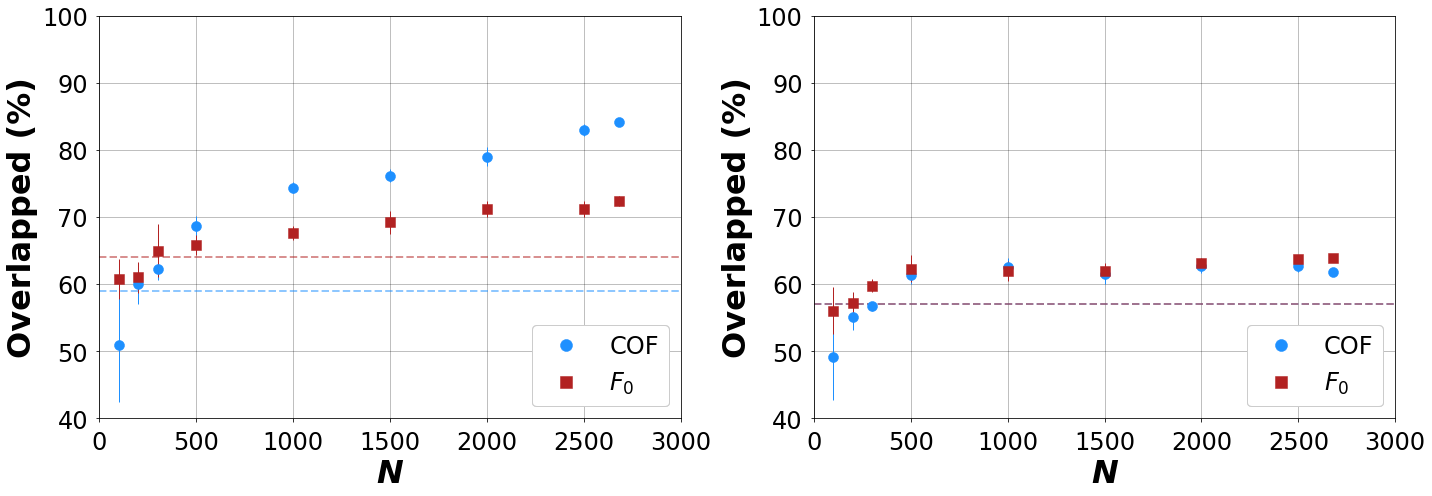

In [87]:

top_sim1 = 0.15
top_prd1 = 0.15


fig1, ax = plt.subplots(1, 2, figsize=(20, 7))

markers = {'COF': ['o', '--', 'dodgerblue'], 'intercept': ['s', '--', 'firebrick'], 'opt': ['s', '--', 'indigo']}

for target in ['COF', 'intercept']:
    ax[0].errorbar(x=plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50']['points'], 
                      y=[np.mean(vals) for vals in plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)
    ax[1].errorbar(x=plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50']['points'], 
                      y=[np.mean(vals) for vals in plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)

    ax[0].axhline(plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['original'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)
    ax[1].axhline(plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['original'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)


#ax.legend()
leg1_ele = [Line2D([0], [0], color='dodgerblue', marker='o', markersize=12, linestyle='', label='COF'),
                   Line2D([0], [0], color='firebrick', marker='s', markersize=12, linestyle='', label=r'$\mathit{F_0}$')]

for i in [0, 1]:
    legend = ax[i].legend(handles=leg1_ele, loc=4, prop={'size': 24})# title='Properties')
    ax[i].set_ylim(40, 100)
    ax[i].set_xlim(0, 3000)
    ax[i].set_xlabel('N', style='italic')
    ax[i].set_ylabel('Overlapped (%)')
    ax[i].add_artist(legend)

plt.savefig(fname=f'./plots/top_v2/train50({top_prd1})-test50({top_sim1})test25({top_sim1}).pdf', dpi=500, bbox_inches='tight')

plt.show()
plt.close()

## Top 30% of test-5050/2575predicted by m50

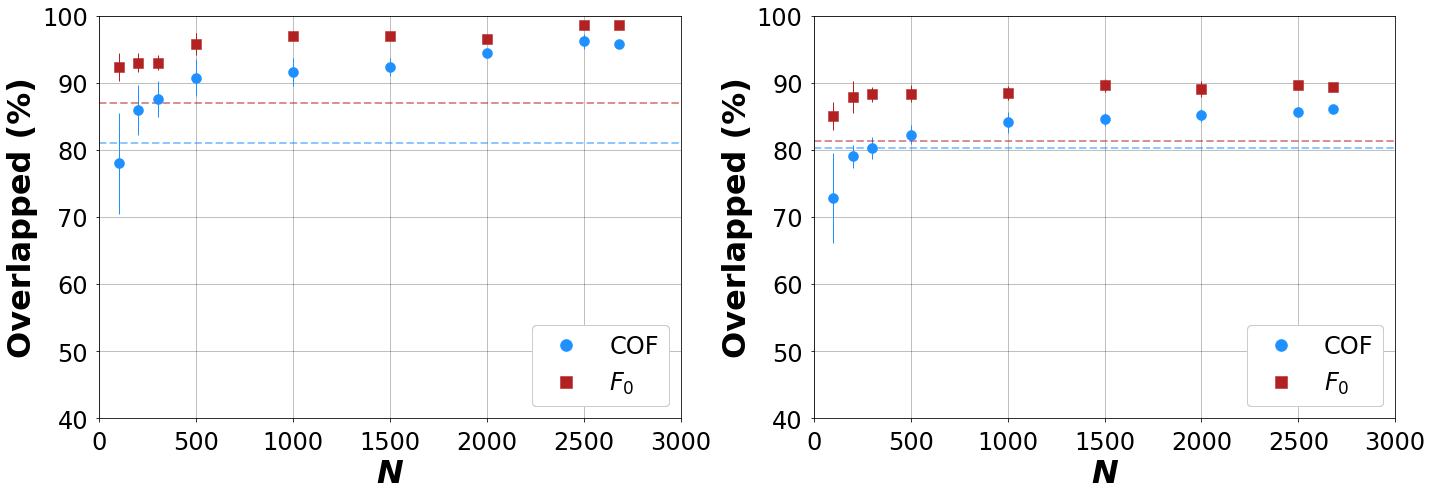

In [89]:

top_sim1 = 0.15
top_prd1 = 0.30


fig1, ax = plt.subplots(1, 2, figsize=(20, 7))

markers = {'COF': ['o', '--', 'dodgerblue'], 'intercept': ['s', '--', 'firebrick'], 'opt': ['s', '--', 'indigo']}

for target in ['COF', 'intercept']:
    ax[0].errorbar(x=plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50']['points'], 
                      y=[np.mean(vals) for vals in plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)
    ax[1].errorbar(x=plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50']['points'], 
                      y=[np.mean(vals) for vals in plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      yerr=[np.std(vals) for vals in plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['m50'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)

    ax[0].axhline(plot_data['5050']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['original'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)
    ax[1].axhline(plot_data['2575']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['original'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)


#ax.legend()
leg1_ele = [Line2D([0], [0], color='dodgerblue', marker='o', markersize=12, linestyle='', label='COF'),
                   Line2D([0], [0], color='firebrick', marker='s', markersize=12, linestyle='', label=r'$\mathit{F_0}$')]

for i in [0, 1]:
    legend = ax[i].legend(handles=leg1_ele, loc=4, prop={'size': 24})# title='Properties')
    ax[i].set_ylim(40, 100)
    ax[i].set_xlim(0, 3000)
    ax[i].set_xlabel('N', style='italic')
    ax[i].set_ylabel('Overlapped (%)')
    ax[i].add_artist(legend)

plt.savefig(fname=f'./plots/top_v2/train50({top_prd1})-test50({top_sim1})test25({top_sim1}).pdf', dpi=500, bbox_inches='tight')

plt.show()
plt.close()

In [98]:
for prd in ["0.15", "0.3"]:
    print("top", prd)
    for tset in ["5050", "2575"]:
        print("tset", tset)
        for target in ["COF", "intercept"]:
            print(target)
            print(plot_data[tset]['top'][f'top_0.15sim_{prd}prd']['m50']["points"])
            print([np.mean(vals) for vals in plot_data[tset]['top'][f'top_0.15sim_{prd}prd']['m50'][target]])
            print([np.std(vals) for vals in plot_data[tset]['top'][f'top_0.15sim_{prd}prd']['m50'][target]])


top 0.15
tset 5050
COF
[100, 200, 300, 500, 1000, 1500, 2000, 2500, 2680]
[51.0, 60.0, 62.2, 68.6, 74.4, 76.2, 79.0, 83.0, 84.2]
[8.555699854482974, 2.898275349237885, 1.5999999999999999, 1.4966629547095764, 0.8, 0.9797958971132712, 1.4142135623730951, 0.8944271909999159, 0.4]
intercept
[100, 200, 300, 500, 1000, 1500, 2000, 2500, 2680]
[60.8, 61.0, 65.0, 65.8, 67.6, 69.2, 71.2, 71.2, 72.4]
[2.9933259094191564, 2.366431913239848, 3.8987177379235853, 1.4696938456699067, 1.019803902718557, 1.7204650534085253, 1.16619037896906, 1.16619037896906, 0.8]
tset 2575
COF
[100, 200, 300, 500, 1000, 1500, 2000, 2500, 2680]
[49.119170984455955, 55.12953367875648, 56.6839378238342, 61.34715025906736, 62.59067357512953, 61.554404145077726, 62.69430051813472, 62.69430051813472, 61.865284974093264]
[6.349211888928656, 2.03594639423715, 0.6217616580310903, 1.3351397644274756, 1.3669332599246553, 1.5159314858370767, 1.086848547326583, 0.8670052088436022, 0.41450777202072686]
intercept
[100, 200, 300, 500

# Top 15% of combined predicted by m50 amd eve models

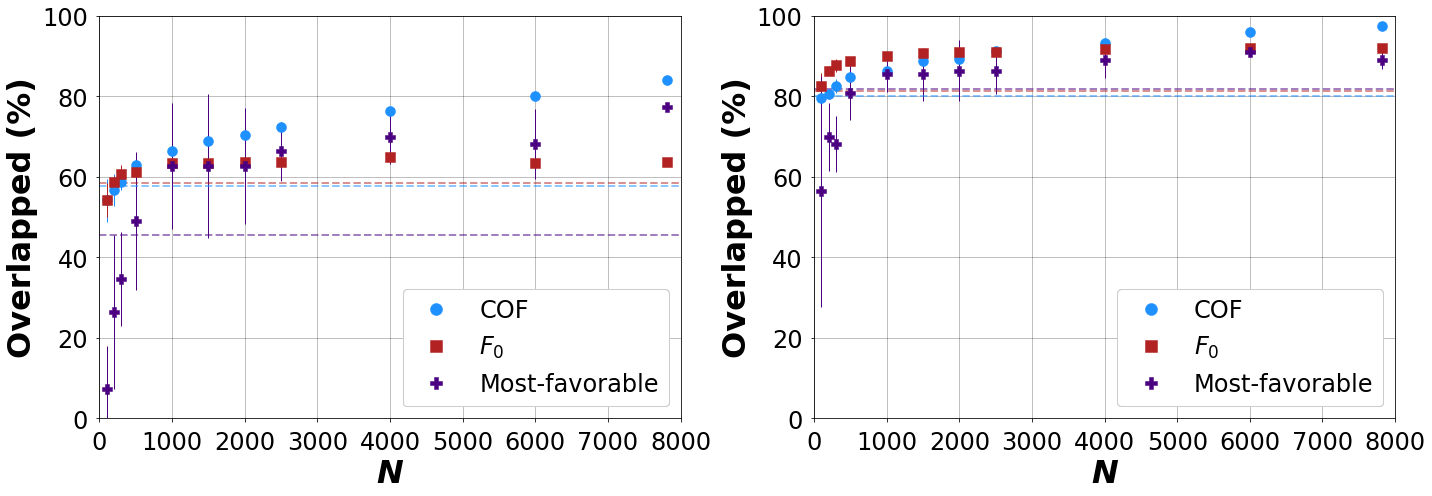

In [99]:

top_sim1 = 0.15
top_prd1 = 0.15

top_sim2 = 0.15
top_prd2 = 0.3

fig1, ax = plt.subplots(1, 2, figsize=(20, 7))

markers = {'COF': ['o', '--', 'dodgerblue'], 'intercept': ['s', '--', 'firebrick'], 'opt': ['P', '--', 'indigo']}

for target in ['COF', 'intercept', 'opt']:
    ax[0].errorbar(x=plot_data['everything']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['eve']['points'], 
                      y=[np.mean(vals) for vals in plot_data['everything']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['eve'][target]],
                      yerr=[np.std(vals) for vals in plot_data['everything']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['eve'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)


    ax[0].axhline(plot_data['everything']['top'][f'top_{top_sim1}sim_{top_prd1}prd']['original'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)


    ax[1].errorbar(x=plot_data['everything']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['eve']['points'], 
                      y=[np.mean(vals) for vals in plot_data['everything']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['eve'][target]],
                      yerr=[np.std(vals) for vals in plot_data['everything']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['eve'][target]],
                      fmt=markers[target][0],
                      color=markers[target][2],
                      markersize=markersize,
                      elinewidth=elinewidth)


    ax[1].axhline(plot_data['everything']['top'][f'top_{top_sim2}sim_{top_prd2}prd']['original'][target],
                linestyle=markers[target][1],
                linewidth=2,
                color=markers[target][2],
                alpha=alpha)


ax[0].set_xlabel('N', style='italic')
ax[0].set_ylabel('Overlapped (%)')
ax[1].set_xlabel('N', style='italic')
ax[1].set_ylabel('Overlapped (%)')

ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)
ax[0].set_xlim(0, 8000)
ax[1].set_xlim(0, 8000)

#ax.legend()
leg1_ele = [Line2D([0], [0], color='dodgerblue', marker='o', markersize=12, linestyle='', label='COF'),
            Line2D([0], [0], color='firebrick', marker='s', markersize=12, linestyle='', label=r'$\mathit{F_0}$'),
            Line2D([0], [0], color='indigo', marker='P', markersize=12, linestyle='', label='Most-favorable')]

legend1a = ax[0].legend(handles=leg1_ele, loc=4, prop={'size': 24})#, title='Properties')
ax[0].add_artist(legend1a)

legend1b = ax[1].legend(handles=leg1_ele, loc=4, prop={'size': 24})#, title='Properties')
ax[1].add_artist(legend1b)


plt.savefig(fname=f'./plots/top_v2/traineve({top_prd1}-{top_prd2})-traineve({top_sim1}).pdf', dpi=500, bbox_inches='tight')


plt.show()
plt.close()

In [105]:
for prd in ["0.15", "0.3"]:
    print("top", prd)
    for tset in ["everything"]:
        print("tset", tset)
        for target in ["COF", "intercept", "opt"]:
            print(target)
            print(plot_data[tset]['top'][f'top_0.15sim_{prd}prd']['eve']["points"])
            print([np.mean(vals) for vals in plot_data[tset]['top'][f'top_0.15sim_{prd}prd']['eve'][target]])
            print([np.std(vals) for vals in plot_data[tset]['top'][f'top_0.15sim_{prd}prd']['eve'][target]])


top 0.15
tset everything
COF
[100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 7816]
[54.19795221843003, 56.72354948805461, 58.63481228668942, 62.86689419795223, 66.48464163822526, 68.87372013651878, 70.37542662116041, 72.49146757679182, 76.45051194539249, 80.13651877133105, 84.16382252559727]
[5.354773694868311, 3.8997561384534323, 1.9354876284993632, 1.5625287566224697, 0.9259153560580567, 0.33440133007279116, 0.7288108021864363, 0.27303754266211583, 0.6475653911607656, 0.6617992979407962, 0.2730375426621208]
intercept
[100, 200, 300, 500, 1000, 1500, 2000, 2500, 4000, 6000, 7816]
[54.19795221843003, 58.63481228668942, 60.750853242320815, 61.22866894197953, 63.34470989761091, 63.48122866894198, 63.68600682593857, 63.68600682593857, 64.9146757679181, 63.344709897610926, 63.617747440273035]
[4.275893450748348, 1.5171406669551444, 2.211856893654561, 1.5803190310976405, 2.5042916488524405, 1.7799870048334878, 1.8643686394194736, 1.4735176208138503, 0.7901595155488224, 1.0921501706

In [102]:
plot_data[tset]['top'][f'top_0.15sim_{prd}prd'].keys()

dict_keys(['original', 'm50', 'eve'])